In [1]:
import matplotlib.pyplot as plt
import numpy as np
import sklearn
import pandas as pd

# Getting the Data

## Download Mushroom Data

In [2]:
import os
from zipfile import ZipFile
import urllib.request

DOWNLOAD_ROOT = "https://archive.ics.uci.edu/static/public/73/"
MUSHROOM_PATH = os.path.join("datasets", "mushrooms")
MUSHROOM_URL = DOWNLOAD_ROOT + "mushroom.zip"

def fetch_mushroom_data(mushroom_url=MUSHROOM_URL, mushroom_path=MUSHROOM_PATH):
    if not os.path.isdir(mushroom_path):
        os.makedirs(mushroom_path)
    zip_path = os.path.join(mushroom_path, "mushroom.zip")
    urllib.request.urlretrieve(mushroom_url, zip_path)

    with ZipFile(zip_path) as mushrooms_zip:
        mushrooms_zip.extractall(path=mushroom_path)

In [3]:
fetch_mushroom_data()

In [4]:
def load_mushroom_data(mushroom_path=MUSHROOM_PATH):
    data_path = os.path.join(mushroom_path, "agaricus-lepiota.data")
    name_path = os.path.join(mushroom_path, "agaricus-lepiota.names")
    column_names = ['edible?','cap-shape','cap-surface','cap-color','bruises?','odor','gill-attachment','gill-spacing','gill-size','gill-color','stalk-shape','stalk-root','stalk-surface-above-ring','stalk-surface-below-ring',
                    'stalk-color-above-ring','stalk-color-below-ring','veil-type','veil-color','ring-number','ring-type','spore-print-color','population','habitat']
    return pd.read_csv(data_path,names=column_names)

## Taking a Quick Look at the Data Structure

From agarius-lepiota.names:

In [10]:
with open(os.path.join(MUSHROOM_PATH, "agaricus-lepiota.names"), 'r') as f:
    att_description = False
    for line in f:
        if('7. Attribute' in line): att_description = True
        if('8. Missing' in line): att_description = False
        if(att_description):
            print(line)

7. Attribute Information: (classes: edible=e, poisonous=p)

     1. cap-shape:                bell=b,conical=c,convex=x,flat=f,

                                  knobbed=k,sunken=s

     2. cap-surface:              fibrous=f,grooves=g,scaly=y,smooth=s

     3. cap-color:                brown=n,buff=b,cinnamon=c,gray=g,green=r,

                                  pink=p,purple=u,red=e,white=w,yellow=y

     4. bruises?:                 bruises=t,no=f

     5. odor:                     almond=a,anise=l,creosote=c,fishy=y,foul=f,

                                  musty=m,none=n,pungent=p,spicy=s

     6. gill-attachment:          attached=a,descending=d,free=f,notched=n

     7. gill-spacing:             close=c,crowded=w,distant=d

     8. gill-size:                broad=b,narrow=n

     9. gill-color:               black=k,brown=n,buff=b,chocolate=h,gray=g,

                                  green=r,orange=o,pink=p,purple=u,red=e,

                                  white=w,yellow=y

 

In [7]:
mushrooms = load_mushroom_data()
mushrooms.head()

,edible?,cap-shape,cap-surface,cap-color,bruises?,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,p,x,s,n,t,p,f,c,n,k,...,s,w,w,p,w,o,p,k,s,u
1,e,x,s,y,t,a,f,c,b,k,...,s,w,w,p,w,o,p,n,n,g
2,e,b,s,w,t,l,f,c,b,n,...,s,w,w,p,w,o,p,n,n,m
3,p,x,y,w,t,p,f,c,n,n,...,s,w,w,p,w,o,p,k,s,u
4,e,x,s,g,f,n,f,w,b,k,...,s,w,w,p,w,o,e,n,a,g


In [6]:
mushrooms.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8124 entries, 0 to 8123
Data columns (total 23 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   edible?                   8124 non-null   object
 1   cap-shape                 8124 non-null   object
 2   cap-surface               8124 non-null   object
 3   cap-color                 8124 non-null   object
 4   bruises?                  8124 non-null   object
 5   odor                      8124 non-null   object
 6   gill-attachment           8124 non-null   object
 7   gill-spacing              8124 non-null   object
 8   gill-size                 8124 non-null   object
 9   gill-color                8124 non-null   object
 10  stalk-shape               8124 non-null   object
 11  stalk-root                8124 non-null   object
 12  stalk-surface-above-ring  8124 non-null   object
 13  stalk-surface-below-ring  8124 non-null   object
 14  stalk-color-above-ring  

In [13]:
#How many edible vs. poisonous mushrooms do we have in our dataset?
mushrooms["edible?"].value_counts()

e    4208
p    3916
Name: edible?, dtype: int64

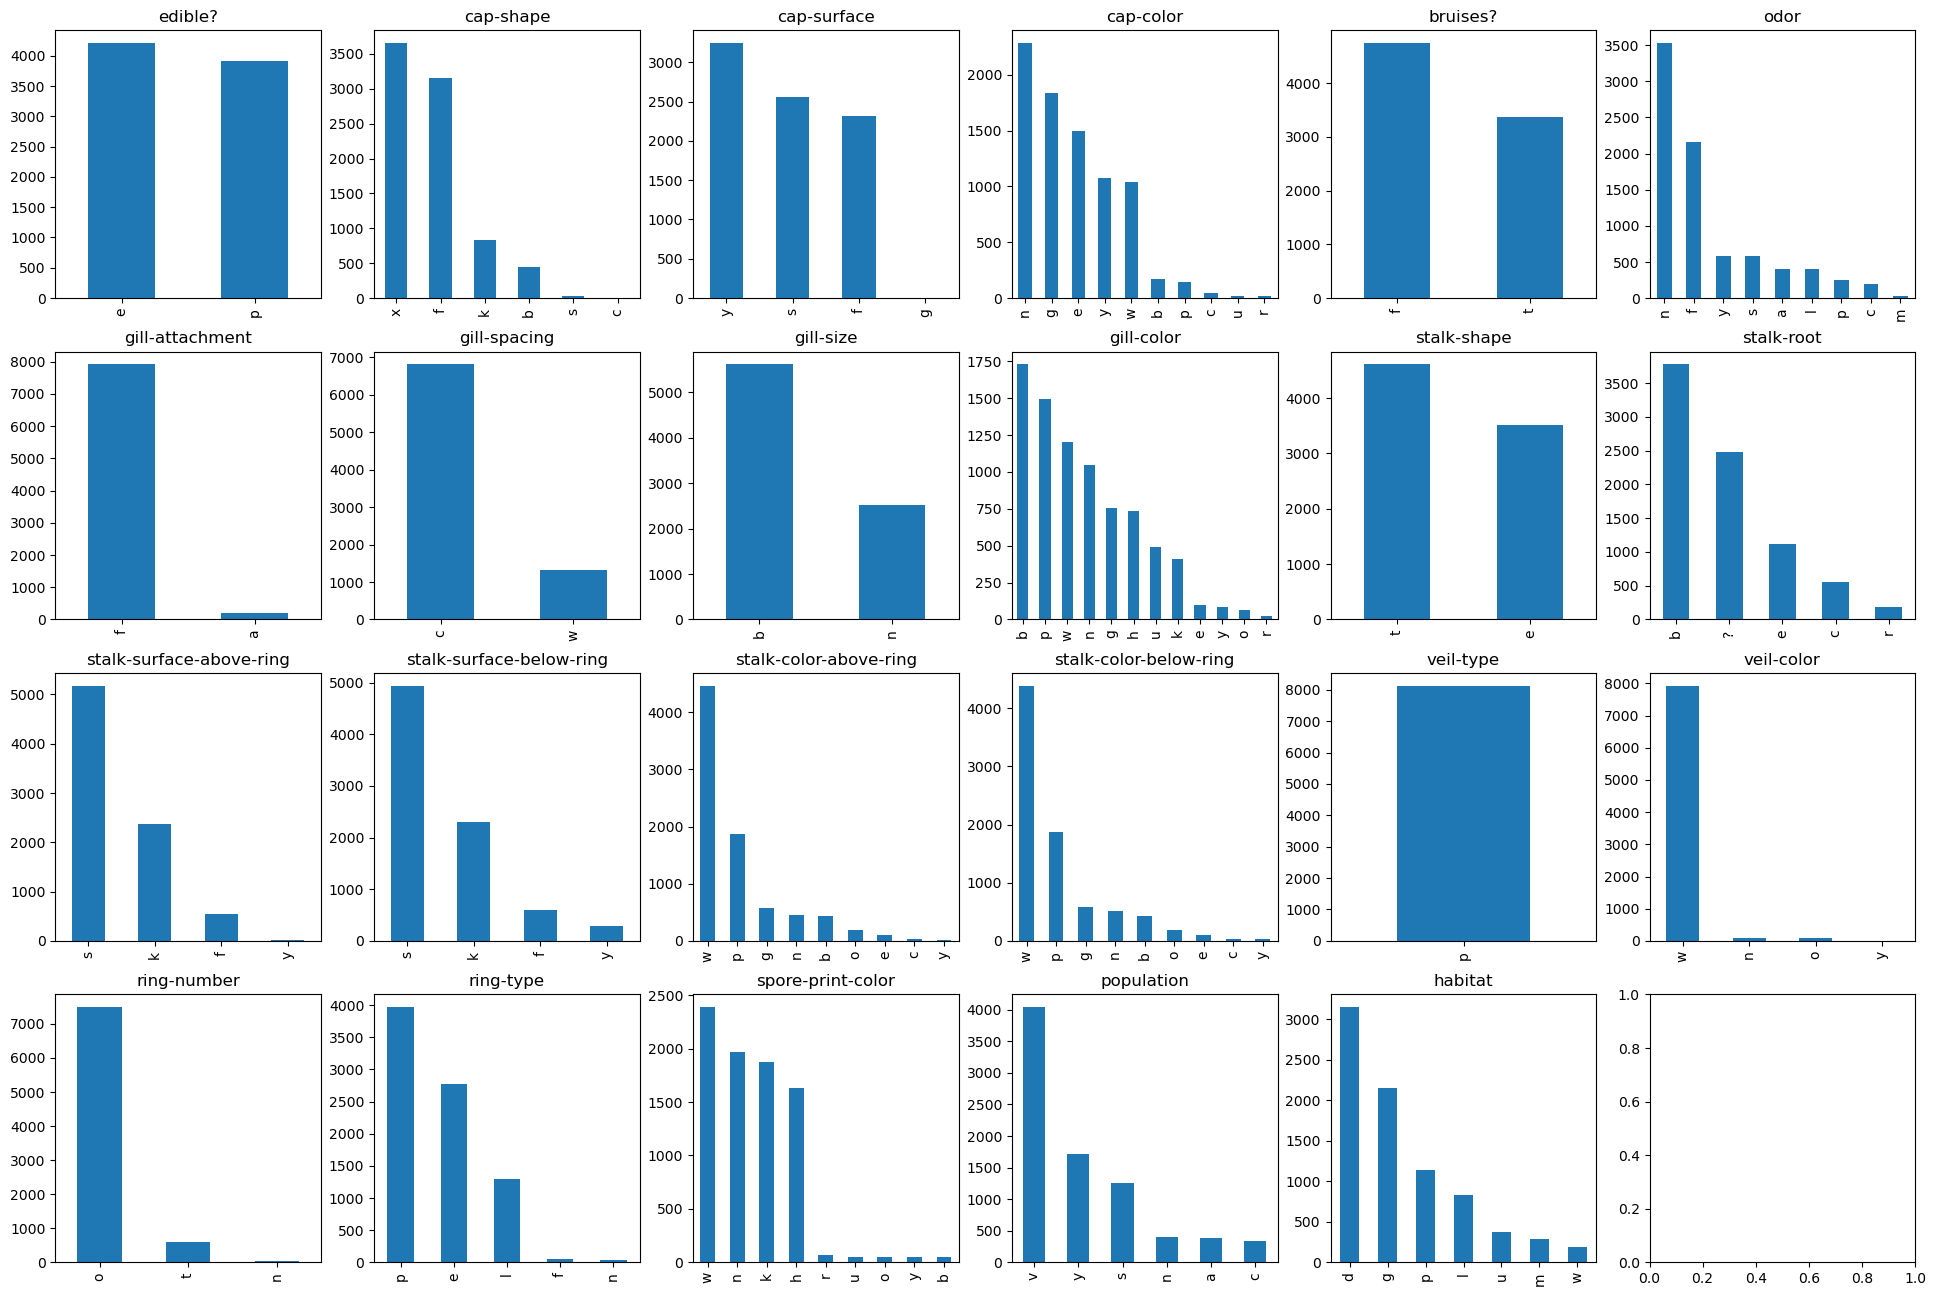

In [35]:
fig, ax = plt.subplots(4,6,figsize=(24,16))

for i, feature in enumerate(mushrooms):
    mushrooms[feature].value_counts().plot(kind='bar', ax=fig.axes[i]).set_title(feature)

Some observations:
- quite a few tail-heavy distributions
- stalk-root category seems to have quite a few missing values labelled '?' (this is confirmed by the data description file agaricus-lepiota.names). We will have to deal with this in the data cleaning section

## Creating a Test Set